In [282]:
import pandas as pd
import numpy as np

# Define the column names
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

In [146]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
pd.set_option('display.max_columns', None)

In [122]:
adult = pd.read_csv('/Users/macbookair/Documents/PYTHON/Projects/ML-with-Python/data/adult.data', names=columns, sep=',\s+', engine='python', na_values="?")



<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mm/vc73ccrd1pl1hf0_z819ftw00000gp/T/ipykernel_43750/1262969911.py:1: SyntaxWarning: invalid escape sequence '\s'
  adult = pd.read_csv('/Users/macbookair/Documents/PYTHON/Projects/ML-with-Python/data/adult.data', names=columns, sep=',\s+', engine='python', na_values="?")


In [123]:
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [124]:
adult["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [125]:
adult["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [126]:
adult["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [127]:
adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [128]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [129]:
adult["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [130]:
y= adult["income"].map({'<=50K':0, '>50K':1})

In [131]:
y.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [132]:
adult_dummy= pd.get_dummies(adult, columns= ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"], drop_first=True)

In [133]:
adult_dummy.drop("income", axis=1, inplace=True)

In [134]:
adult_dummy.loc[:, adult_dummy.dtypes == "bool"]= adult_dummy.loc[:, adult_dummy.dtypes == "bool"].apply(lambda x: x.astype('int64'))

/var/folders/mm/vc73ccrd1pl1hf0_z819ftw00000gp/T/ipykernel_43750/2203357357.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  adult_dummy.loc[:, adult_dummy.dtypes == "bool"]= adult_dummy.loc[:, adult_dummy.dtypes == "bool"].apply(lambda x: x.astype('int64'))
/var/folders/mm/vc73ccrd1pl1hf0_z819ftw00000gp/T/ipykernel_43750/2203357357.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  adult_dummy.loc[:, adult_dummy.dtypes == "bool"]= adult_dummy.loc[:, adult_dummy.dtypes == "bool"].apply(lambda x: x.astype('int64'))
/var/folders/mm/vc73ccrd1pl1hf0_z819ftw00000gp/T/ipykernel_43750/2203357357.py:1: FutureWarning: Setting an item of in

In [135]:
adult_dummy

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58

In [136]:
X= adult_dummy.copy()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred= knn.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Train Score:", knn.score(X_train_scaled, y_train))
print("Test Score:", knn.score(X_test_scaled, y_test))


Accuracy: 0.8262
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4945
           1       0.65      0.59      0.62      1568

    accuracy                           0.83      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513

Confusion Matrix:
[[4459  486]
 [ 646  922]]
Train Score: 0.8731572481572482
Test Score: 0.8261937663135268


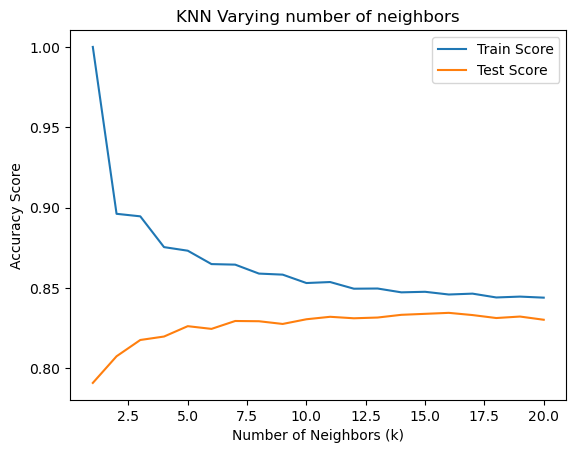

In [147]:
n_neighbors= list(range(1, 21))
train_scores= []
test_scores= []
for k in n_neighbors:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

plt.plot(n_neighbors, train_scores, label='Train Score')
plt.plot(n_neighbors, test_scores, label='Test Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN Varying number of neighbors')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log= log_reg.predict(X_test_scaled)
accuracy_log= accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8548
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.74      0.62      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

Logistic Regression Confusion Matrix:
[[4602  343]
 [ 603  965]]


In [199]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=1000, random_state=42, max_depth= 5, min_samples_split= 10, min_samples_leaf= 5)
rf.fit(X_train_scaled, y_train)
y_pred_rf= rf.predict(X_test_scaled)
accuracy_rf= accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8457
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      4945
           1       0.87      0.42      0.57      1568

    accuracy                           0.85      6513
   macro avg       0.86      0.70      0.74      6513
weighted avg       0.85      0.85      0.82      6513

Random Forest Confusion Matrix:
[[4848   97]
 [ 908  660]]


In [ ]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf', C=1.0)
svm.fit(X_train_scaled, y_train)
y_pred_svm= svm.predict(X_test_scaled)
accuracy_svm= accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))   

SVM Accuracy: 0.8512
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4945
           1       0.75      0.58      0.65      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513

SVM Confusion Matrix:
[[4634  311]
 [ 658  910]]


In [209]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth= 3, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb= gb.predict(X_test_scaled)
accuracy_gb= accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8713
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4945
           1       0.78      0.64      0.71      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513

Gradient Boosting Confusion Matrix:
[[4669  276]
 [ 562 1006]]


In [188]:
important_features_gb= pd.DataFrame({"columns": X.columns, "Feature Importance": gb.feature_importances_}).sort_values(by="Feature Importance", ascending=False).nlargest(15, 'Feature Importance')
important_features_rf= pd.DataFrame({"columns": X.columns, "Feature Importance": rf.feature_importances_}).sort_values(by="Feature Importance", ascending=False).nlargest(15, 'Feature Importance')

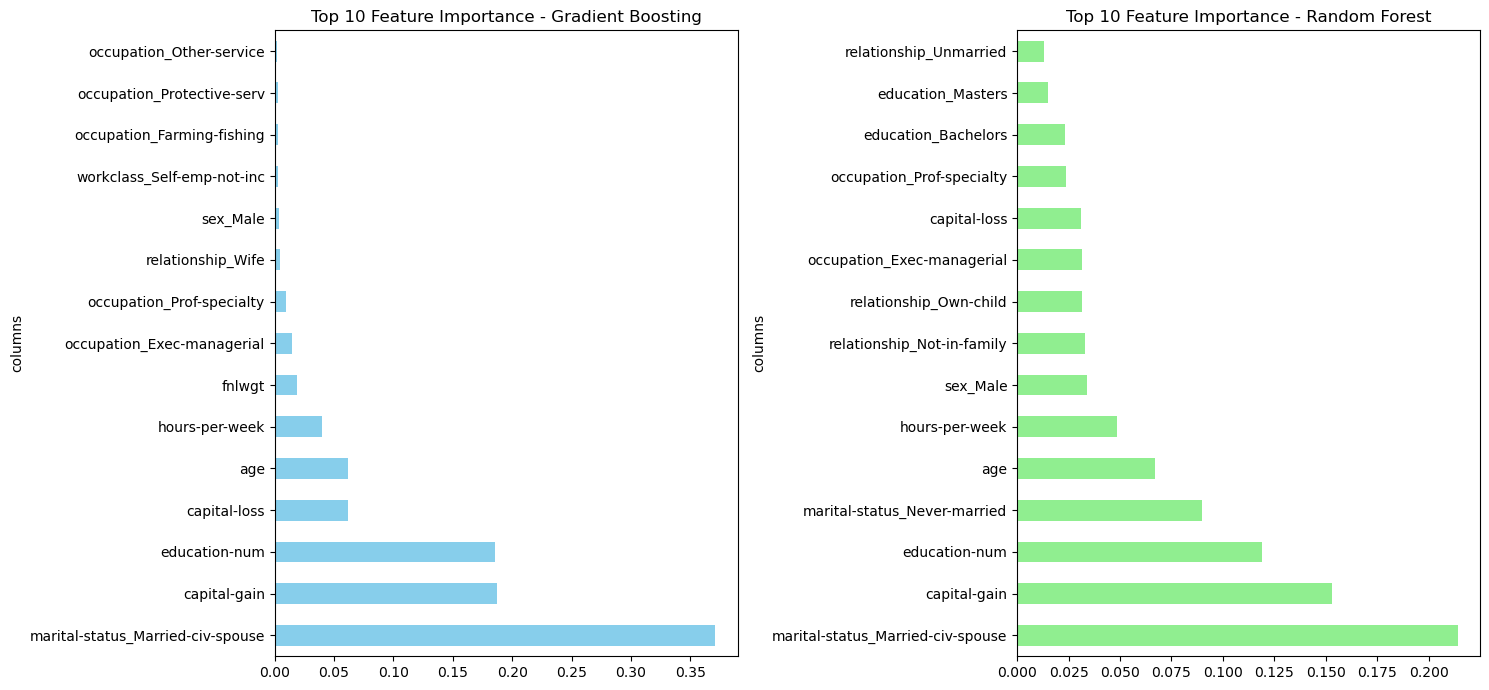

In [189]:
fig, ax= plt.subplots(1, 2, figsize=(15, 7))
important_features_gb.plot(kind='barh', x='columns', y='Feature Importance', legend=False, ax=ax[0], color='skyblue', title='Top 10 Feature Importance - Gradient Boosting')
important_features_rf.plot(kind='barh', x='columns', y='Feature Importance', legend=False, ax=ax[1], color='lightgreen', title='Top 10 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


In [216]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector= SelectPercentile(score_func=f_classif, percentile= 20)
X_train_selected= selector.fit_transform(X_train_scaled, y_train)  
X_test_selected= selector.transform(X_test_scaled)  
gb_selected= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth= 5, random_state=42)
gb_selected.fit(X_train_selected, y_train)
y_pred_gb_selected= gb_selected.predict(X_test_selected)
accuracy_gb_selected= accuracy_score(y_test, y_pred_gb_selected)
print(f"Gradient Boosting with Feature Selection Accuracy: {accuracy_gb_selected:.4f}")
print("Gradient Boosting with Feature Selection Classification Report:")
print(classification_report(y_test, y_pred_gb_selected))
print("Gradient Boosting with Feature Selection Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb_selected))

Gradient Boosting with Feature Selection Accuracy: 0.8687
Gradient Boosting with Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4945
           1       0.78      0.63      0.70      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513

Gradient Boosting with Feature Selection Confusion Matrix:
[[4670  275]
 [ 580  988]]


In [220]:
from sklearn.feature_selection import SelectFromModel
select_from_model= SelectFromModel(rf, threshold='median')  
X_train_selected_model= select_from_model.fit_transform(X_train_scaled, y_train)  
X_test_selected_model= select_from_model.transform(X_test_scaled)  
model_selected= LogisticRegression(max_iter=1000)
model_selected.fit(X_train_selected_model, y_train)
y_pred_model_selected= model_selected.predict(X_test_selected_model)
accuracy_model_selected= accuracy_score(y_test, y_pred_model_selected)
print(f"Logistic Regression with Model-Based Feature Selection Accuracy: {accuracy_model_selected:.4f}")
print("Logistic Regression with Model-Based Feature Selection Classification Report:")
print(classification_report(y_test, y_pred_model_selected))
print("Logistic Regression with Model-Based Feature Selection Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_model_selected))

Logistic Regression with Model-Based Feature Selection Accuracy: 0.8548
Logistic Regression with Model-Based Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.74      0.61      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

Logistic Regression with Model-Based Feature Selection Confusion Matrix:
[[4604  341]
 [ 605  963]]


In [221]:
from sklearn.feature_selection import RFE
rfe_selector= RFE(estimator= RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select= 20, step= 5)
X_train_rfe= rfe_selector.fit_transform(X_train_scaled, y_train)  
X_test_rfe= rfe_selector.transform(X_test_scaled)  
rfe_model= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth= 3, random_state=42)
rfe_model.fit(X_train_rfe, y_train)
y_pred_rfe= rfe_model.predict(X_test_rfe)
accuracy_rfe= accuracy_score(y_test, y_pred_rfe)
print(f"Gradient Boosting with RFE Feature Selection Accuracy: {accuracy_rfe:.4f}")
print("Gradient Boosting with RFE Feature Selection Classification Report:")
print(classification_report(y_test, y_pred_rfe))
print("Gradient Boosting with RFE Feature Selection Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rfe))     



Gradient Boosting with RFE Feature Selection Accuracy: 0.8676
Gradient Boosting with RFE Feature Selection Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4945
           1       0.79      0.61      0.69      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.80      6513
weighted avg       0.86      0.87      0.86      6513

Gradient Boosting with RFE Feature Selection Confusion Matrix:
[[4690  255]
 [ 607  961]]


In [232]:
X_train["education-num"]

15738    13
27985    14
30673     9
9505     10
26417    13
         ..
8003      9
20560    10
23650     9
25301    13
5800      6
Name: education-num, Length: 26048, dtype: int64

<Axes: ylabel='marital-status_Married-civ-spouse'>

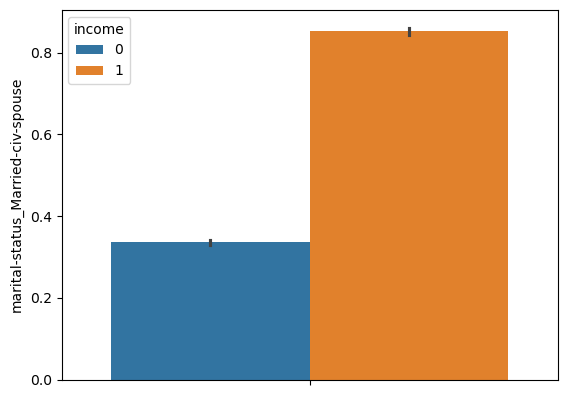

In [231]:
sns.barplot(data=X_train, y= "marital-status_Married-civ-spouse", hue= y_train)

<Axes: xlabel='education-num', ylabel='count'>

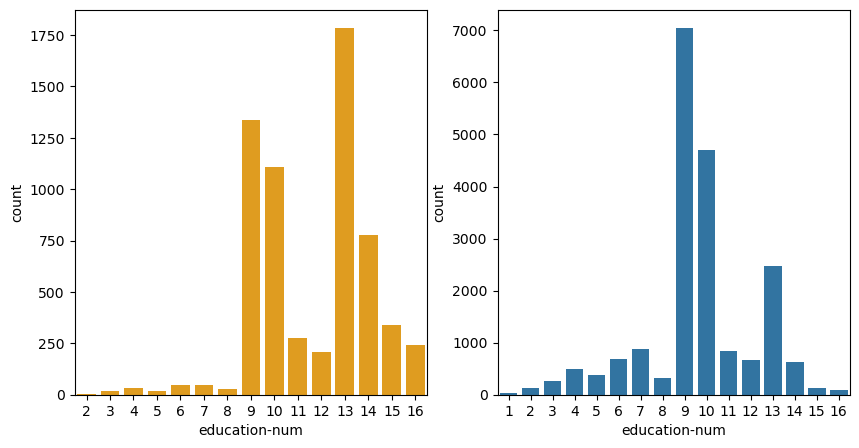

In [ ]:
fig, ax= plt.subplots(1,2, figsize= (10, 5))
sns.countplot(data=X_train.loc[y_train == 1], x= "education-num", stat= "count", ax= ax[0], color= "orange")
sns.countplot(data=X_train.loc[y_train == 0], x= "education-num", stat= "count", ax= ax[1])

In [283]:
X_log= X.copy(deep= True)

In [284]:
X_log["fnlwgt"] = np.log(X_log["fnlwgt"] +1)
X_log["capital-gain"]= np.log(X_log["capital-gain"] + 1)
X_log["capital-loss"]= np.log(X_log["capital-loss"] +1 )

In [286]:
X_train_log, X_test_log, y_train, y_test= train_test_split(X_log, y, test_size= 0.2, stratify= y, random_state= 42)

In [287]:
logistic_log= LogisticRegression(max_iter= 1000)
logistic_log.fit(X_train_log, y_train)
y_pred_log= logistic_log.predict(X_test_log)
accuracy_log= accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8485
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4945
           1       0.72      0.60      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513

Logistic Regression Confusion Matrix:
[[4582  363]
 [ 624  944]]


/Users/macbookair/opt/anaconda3/envs/geo_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [289]:
rf_log= RandomForestClassifier(n_estimators= 1000, max_depth= 3)
rf_log.fit(X_train_log, y_train)
y_pred_rf= rf.predict(X_test_log)
accuracy_rf= accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8088
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4945
           1       0.64      0.46      0.54      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.69      0.71      6513
weighted avg       0.80      0.81      0.80      6513

Random Forest Confusion Matrix:
[[4543  402]
 [ 843  725]]


/Users/macbookair/opt/anaconda3/envs/geo_env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [311]:
from sklearn.model_selection import GridSearchCV
estimator= KNeighborsClassifier()
parameters = {"n_neighbors": list(range(1,10)), "weights": ["uniform","distance"]}
grid= GridSearchCV(estimator=estimator, param_grid=parameters, scoring= "accuracy")
grid.fit(X_train_scaled, y_train)
best_score= grid.best_score_
best_param= grid.best_params_
print(f"Best model's accuracy: {best_score*100:.2f}")
print(f"Best model's parameters: {best_param}")

Best model's accuracy: 82.35
Best model's parameters: {'n_neighbors': 8, 'weights': 'uniform'}


In [312]:
accuracy= grid.best_estimator_.score(X_test_scaled, y_test)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 82.93


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58

In [317]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kfold= StratifiedKFold(n_splits= 10, shuffle= True, random_state= 23)
model= RandomForestClassifier(n_estimators= 1000, max_depth= 6)
scores= cross_val_score(model, X, y, cv= kfold)
print(scores)

[0.84187903 0.8458231  0.85350123 0.84305897 0.84613022 0.85104423
 0.84244472 0.84213759 0.84920147 0.83906634]


In [319]:
kfold= StratifiedKFold(n_splits= 10, shuffle= True, random_state= 23)
model= GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth= 3, random_state=42)
scores= cross_val_score(model, X, y, cv= kfold)
print(scores)

[0.87442432 0.86701474 0.87561425 0.86885749 0.8737715  0.87561425
 0.86793612 0.86855037 0.87285012 0.85810811]
